<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузим-данные-из-файла-и-изучим-их." data-toc-modified-id="Загрузим-данные-из-файла-и-изучим-их.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузим данные из файла и изучим их.</a></span></li></ul></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-логической-регрессии" data-toc-modified-id="Модель-логической-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель логической регрессии</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

**Описание данных:**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.\
Известно:
- **сalls** — количество звонков;
- **minutes** — суммарная длительность звонков в минутах;
- **messages** — количество sms-сообщений;
- **mb_used** — израсходованный интернет-трафик в Мб;
- **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


### Загрузим данные из файла и изучим их.

In [2]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('users_behavior.csv')

In [3]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Мы наблюдаем небольшую таблицу с малым количеством столбцов. Проверим нет ли проблем с ней в целом:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.duplicated().sum()

0

**Вывод:** Таблица не имеет пропусков или дублирующих записей. Единственный смущающий момент - это типы данных в столбцах calls и messages, так как количество звонков и сообщений не может быть дробным. Их можно было бы перевести в int, но нет уверенности что для текущей задачи это нужно.

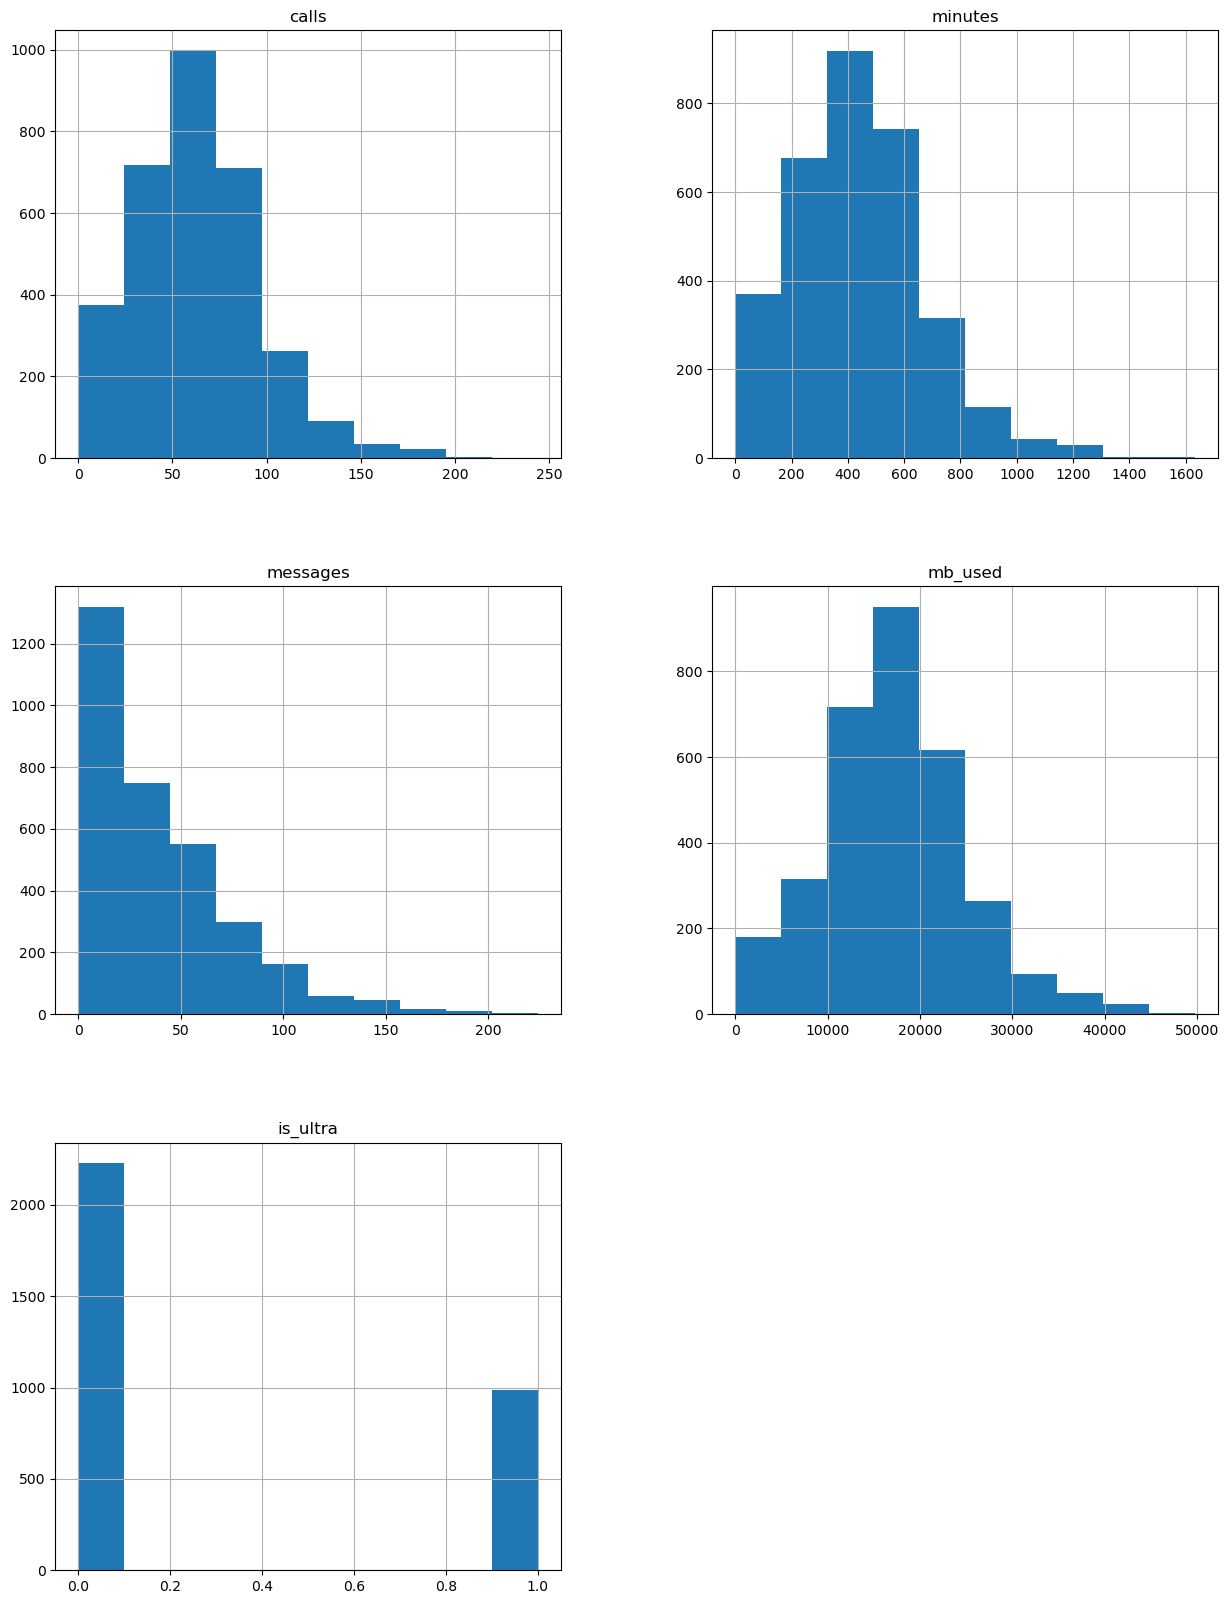

In [6]:
data.hist(figsize=(15, 20));

Мы наблюдаем большой перекос в данных в левую сторону, что дает повод предположить о неравномерности выборки. Особенно ярко это выражается в столбцах messages и ключевой is_ultra.

In [7]:
data.groupby(['is_ultra'])[['calls','minutes', 'messages', 'mb_used']].agg('corr')

calls   minutes  messages   mb_used
is_ultra                                                 
0        calls     1.000000  0.972654  0.208789  0.357349
         minutes   0.972654  1.000000  0.203746  0.341639
         messages  0.208789  0.203746  1.000000  0.146499
         mb_used   0.357349  0.341639  0.146499  1.000000
1        calls     1.000000  0.988235  0.087691  0.176856
         minutes   0.988235  1.000000  0.083000  0.178003
         messages  0.087691  0.083000  1.000000  0.173710
         mb_used   0.176856  0.178003  0.173710  1.000000

Можно наблюдать самый высокий уровень корреляции равный от 0.97 до 0.98 между минутами и наличием пакета ультра. Остальные же признаки почти не влияют на таргет столбец. 

## Разбейте данные на выборки

По условиям задания, нам нужно проанализировать поведение клиентов, и предложить тарифный план. В данном случае данные в столбце is_ultra будут ключевыми. Остальные же столбики будут признаками.

**target** - is_ultra\
**features** - calls, minutes, messages, mb_used.

In [8]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

Разобъем выборку на тестовую, валидационную и обучающую.

In [9]:
features, features_test, target, target_test = train_test_split(features, target, test_size=0.25, random_state=12345, stratify=target)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=12345)

## Исследуйте модели

### Модель решающего дерева

Построим модель решающего дерева и исследуем его качество. Возьмем для работы гиперпараметры max_depth, min_samples_split и min_samples_leaf.

In [10]:
best_accuracy = 0
for max_depth in range(2, 6):
    for min_samples_split in range(2, 6):
        for min_samples_leaf in range(2, 6):
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model_tree.fit(features_train, target_train)
            predictions_valid_tree = model_tree.predict(features_valid)
            result_tree = accuracy_score(target_valid, predictions_valid_tree)
            if result_tree > best_accuracy:
                best_parameter = [max_depth, min_samples_split, min_samples_leaf]
                best_accuracy = result_tree
best_accuracy_tree = best_accuracy                
print('Точность модели:', best_accuracy) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter[0]) 
print('min_samples_split:', best_parameter[1])
print('min_samples_leaf:', best_parameter[2])           

Точность модели: 0.7904564315352697
Гиперпараметры модели:
max_depth: 3
min_samples_split: 2
min_samples_leaf: 2


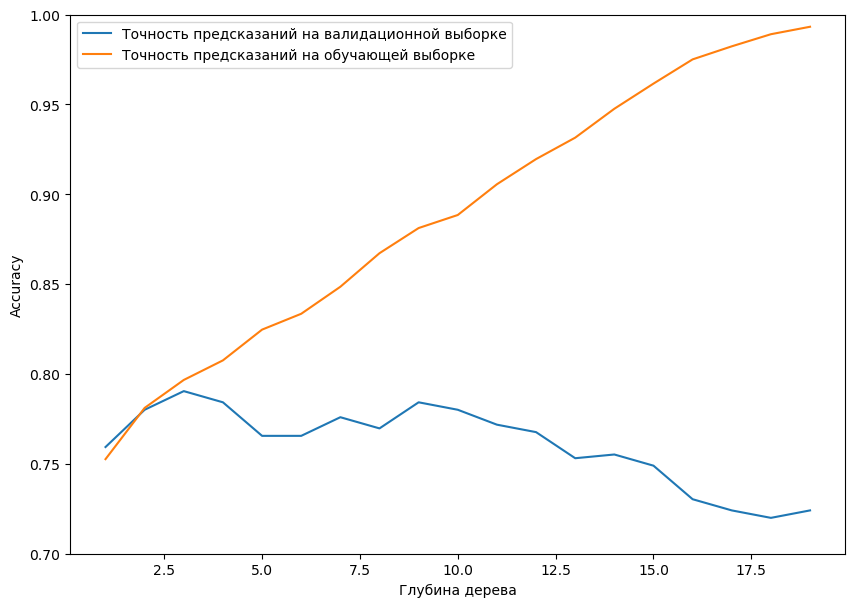

In [11]:
acc_valid = [] # сюда записывается accuracy по валидационной
acc_train = [] # сюда записывается accuracy по обучающей

depth_ = 20

for depth in range(1, depth_):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    
    predictions_valid = model_tree.predict(features_valid)
    predictions_train = model_tree.predict(features_train)
    
#     собираем результаты в списки
    acc_valid.append(accuracy_score(target_valid, predictions_valid))   
    acc_train.append(accuracy_score(target_train, predictions_train))   
    
    
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle('')

# строи по спискам графики
ax.plot(np.arange(1, depth_), acc_valid, )
ax.plot(np.arange(1, depth_), acc_train)

ax.set_xlabel('Глубина дерева')
ax.set_ylabel('Accuracy')

ax.legend(['Точность предсказаний на валидационной выборке', 'Точность предсказаний на обучающей выборке'])

plt.ylim(0.7, 1);  

### Модель случайного леса

Построим модель случайного леса и исследуем его качество. Возьмем для работы гиперпараметры max_depth, min_samples_split,min_samples_leaf и n_estimators.

In [12]:
best_accuracy = 0
for n_estimators in tqdm(range(1, 10)):
    for max_depth in range(2, 6):
        for min_samples_split in range(2, 6):
            for min_samples_leaf in range(2, 6):
                model_forest = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                model_forest.fit(features_train, target_train)
                predictions_valid_forest = model_forest.predict(features_valid)
                result_forest = accuracy_score(target_valid, predictions_valid_forest)
                if result_forest > best_accuracy:
                    best_parameter = [max_depth, n_estimators, min_samples_split, min_samples_leaf]
                    best_accuracy = result_forest
best_accuracy_forest = best_accuracy                    
print('Точность модели:', best_accuracy) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter[0]) 
print('n_estimators:', best_parameter[1])
print('min_samples_split:', best_parameter[2])
print('min_samples_leaf:', best_parameter[3])                      

100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

Точность модели: 0.8008298755186722
Гиперпараметры модели:
max_depth: 5
n_estimators: 9
min_samples_split: 2
min_samples_leaf: 5


### Модель логической регрессии

Построим модель логической регрессии и исследуем ее качество. 

In [13]:
best_accuracy = 0
max_iter=1000
model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=max_iter)
model_log_reg.fit(features_train, target_train)
predictions_log_reg = model_log_reg.predict(features_valid)
result_log_reg = accuracy_score(target_valid, predictions_log_reg)
if result_log_reg > best_accuracy:
    best_accuracy = result_log_reg
best_accuracy_log = best_accuracy
print('Точность модели:', best_accuracy) 
print('Гиперпараметры модели:')
print('max_iter:', max_iter)    

Точность модели: 0.7406639004149378
Гиперпараметры модели:
max_iter: 1000


**Вывод:**

In [14]:
print('Точность модели решающего дерева:', best_accuracy_tree.round(2))
print('Точность модели случайного леса:', best_accuracy_forest.round(2))
print('Точность модели логической регрессии:', best_accuracy_log.round(2))

Точность модели решающего дерева: 0.79
Точность модели случайного леса: 0.8
Точность модели логической регрессии: 0.74


Проведя исследования на четырех разных моделях, мы видим примерно одинаковый уровень точности. Среди моделей решающего дерева, случайного леса и логической регрессии, более точными являются первые две. В данной ситуации оба метода являются приемлемыми, и могут быть использованы для данного датасета. Если важна будет скорость, то модель решающего дерева сможет решить эту проблему. 

## Проверьте модель на тестовой выборке

Мы выяснили, что лучший результат дала модель случайного леса, так что проведем проверку именно на ней. Мне не принципиальна скорость, поэтому я не стану рассматривать модель решающего дерева.\
В модели решающего леса мы получили точность около 0.807, при параметрах:
- max_depth: 4
- n_estimators: 10
- min_samples_split: 2
- min_samples_leaf: 2

In [15]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=2)
model_forest.fit(features, target)
predictions = model_forest.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('Точность модели на тестовой выборке:', accuracy.round(2))

Точность модели на тестовой выборке: 0.81


**Вывод:** Были построены несколько классификационных моделей: решающее дерево, случайный лес, логистическая регрессия и линейная регрессия. Среди них, были выявлены две модели со сходными результатами - это модели решающего дерева и случайного леса, с результатами точночти равными 0.8 и 0.81 соотв. Модель случайного леса была проверена на тестовой выборке, получив резултать accuracy на валидационной выборке 0.81, а на тестовой 0.8.

In [16]:
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])

In [17]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=2)
model_forest.fit(features_train_valid, target_train_valid)
predictions = model_forest.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('Точность модели на тестовой выборке:', accuracy.round(2))

Точность модели на тестовой выборке: 0.8


In [18]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

precision_score(y_true, y_pred, average='micro')

precision_score(y_true, y_pred, average='weighted')

precision_score(y_true, y_pred, average=None)

y_pred = [0, 0, 0, 0, 0, 0]
precision_score(y_true, y_pred, average=None)

precision_score(y_true, y_pred, average=None, zero_division=1)

# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
precision_score(y_true, y_pred, average=None)

C:\Users\Cat\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5, 1. , 1. ])

## (бонус) Проверьте модели на адекватность

In [19]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [20]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features, target)
dummy_clf.score(features, target)

0.6933609958506224

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
